# Визуальный анализ

*Все задания выполняются только при помощи средств визуализации `Python`: `matplotlib`, `seaborn`, `pandas`, `plotly`. По каждому заданию должен быть сделан вывод. Для всех визуализаций используйте стиль `seaborn`. Обязательно добавляйте подпись графика и осей.* 

В этой практической работе вам предстоит провести визуальный анализ данных об особенностях жанров музыки. Датасет возьмите [отсюда](https://www.kaggle.com/vicsuperman/prediction-of-music-genre). Он содержит 41700 уникальных композиций.

Данные содержат 18 столбцов:
- `instance_id` - id строки датасета
- `artist_name` - исполнитель
- `track_name` - название трека
- `popularity` - индекс популярности трека
- `acousticness` - акустичность
- `danceability` - танцевальность (насколько трек подходит для танцев)
- `duration_ms` - длительность трека
- `energy` - энергичность трека
- `instrumentalness` - инструментальность
- `key` - регистр (высота тона)
- `liveness` - живость
- `loudness` - громкость
- `mode` - тональность
- `speechiness` - насколько много текста
- `tempo` - музыкальный темп
- `obtained_date` - дата загрузки трека в датасет
- `valence` - настроение
- `music_genre` - жанр

> **NB!** *Для выполнения задания возьмите 30 тысяч случайных строк из датасета.*

# Часть 1

## Задание 1

Покажите, какие характеристики музыки коррелируют между собой. Сделайте выводы о корреляциях.

In [ ]:
install.packages("corrplot")
library(corrplot)
require(dplyr)

music_genre<-read.csv("music_genre.csv", header = TRUE, na.string=c('?','empty_field'))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
music_genre<-na.omit(music_genre)
music_genre<-music_genre[sample(nrow(music_genre), 30000),]
music_genre<-transform(music_genre, popularity = as.numeric(popularity), 
               acousticness = as.numeric(acousticness),
               danceability=as.numeric(danceability),
               tempo=as.numeric(tempo))

# corrplot(cor(music_genre[c("popularity",	"acousticness",	"danceability",	"duration_ms",	"energy",	"instrumentalness",	"liveness",	"loudness","speechiness",	"tempo","valence")],use="complete.obs"),method="color", tl.pos = 'd', addCoef.col = 'black', col=COL2("PiYG"))

In [ ]:
install.packages("GGally")
library(GGally)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘plyr’, ‘reshape’


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



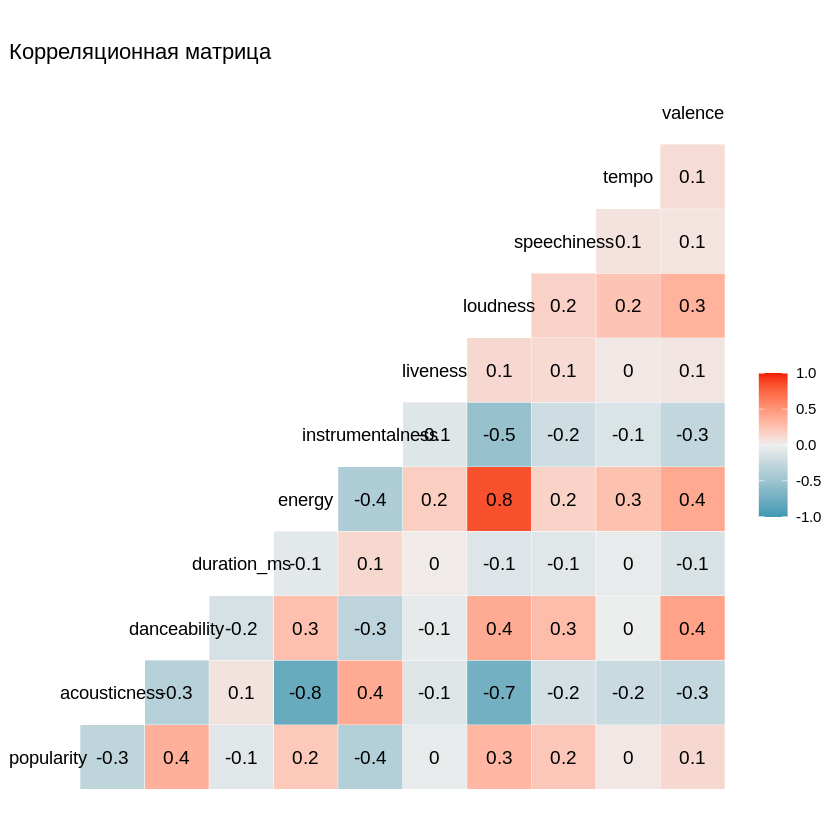

In [ ]:
ggcorr(music_genre[c("popularity",	"acousticness",	"danceability",	"duration_ms",	"energy",	"instrumentalness",	"liveness",	"loudness","speechiness",	"tempo","valence")],label=TRUE)+
ggtitle('Корреляционная матрица')

**Вывод:** По данной корреляционной матрице можно увидеть,что наибольшой корряляцией обладает пара признаков loudness-energy, тогда как наибольшая отрицательная корреляция наблюдается у пары признаков energy-acousticness

## Задание 2

Покажите на диаграмме разброса три пары признаков, имеющих наибольшую отрицательную корреляцию.

In [ ]:
cor_music<-cor(music_genre[c("popularity",	"acousticness",	"danceability",	"duration_ms",	"energy",	"instrumentalness",	"liveness",	"loudness","speechiness",	"tempo","valence")],use="complete.obs")

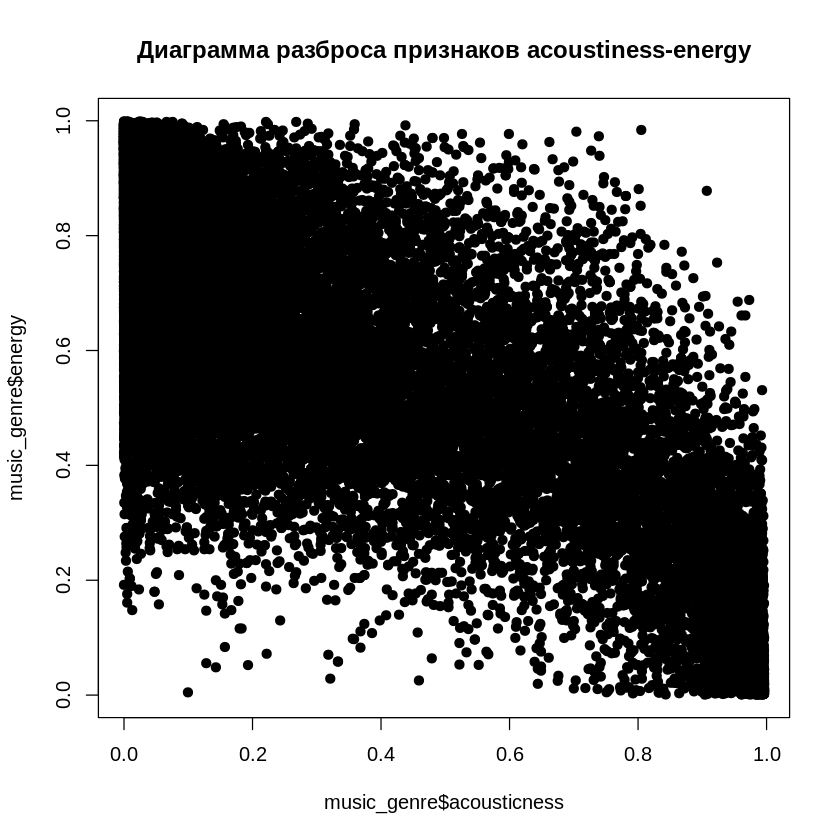

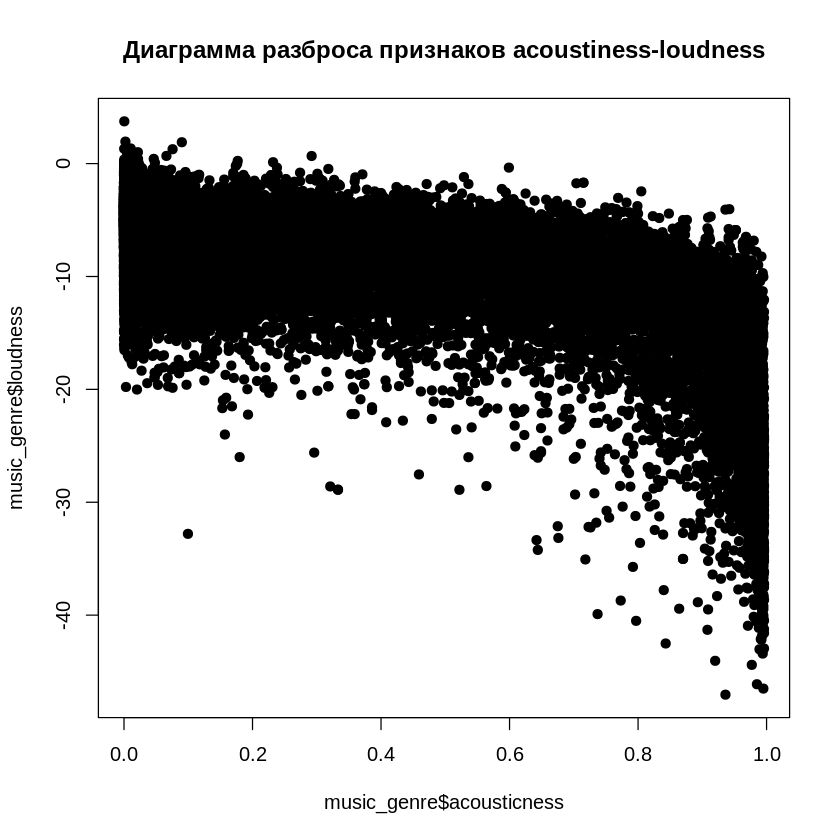

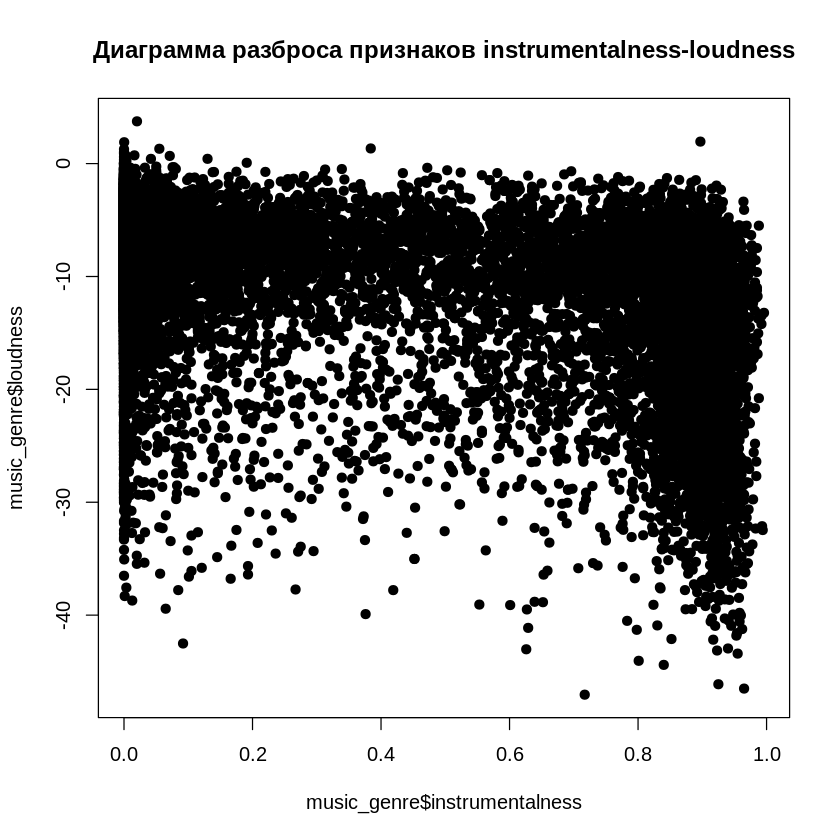

In [ ]:
plot(music_genre$acousticness, music_genre$energy, pch=19,main = "Диаграмма разброса признаков acoustiness-energy")
plot(music_genre$acousticness, music_genre$loudness, pch=19,main = "Диаграмма разброса признаков acoustiness-loudness")
plot(music_genre$instrumentalness, music_genre$loudness, pch=19,main = "Диаграмма разброса признаков instrumentalness-loudness")

**Вывод:** Вывод: На данном графике мы можем увидеть соотношение признаков с наибольшей отрицательной корреляцией.

## Задание 3

Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Выделите контрастным цветом жанр, в котором больше всего песен.

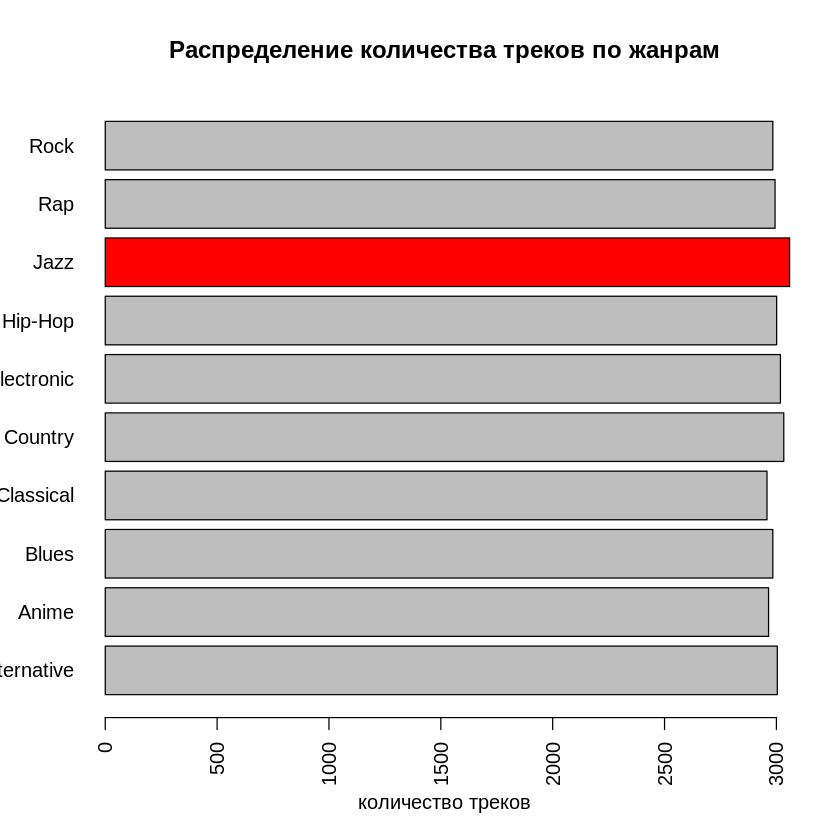

In [ ]:
music_genre<-music_genre[!apply(is.na(music_genre) | music_genre == "",1,all),]
music_genres<-music_genre %>% count(music_genre)

colors = rep("gray", 10)
colors[which.max(music_genres$n)]='red'
barplot(music_genres$n, names.arg = music_genres$music_genre, horiz=TRUE,las=2,main = "Распределение количества треков по жанрам", 
        xlab = "количество треков",col=colors)

**Вывод:** На данной диаграмме можно заметить, что самое большое количество треков наблюдается у жанра Jazz

## Задание 4

Для топ-3 жанров покажите на круговой диаграмме с группировкой топ-3 самых популярных исполнителей. Диаграмма должна быть одна.

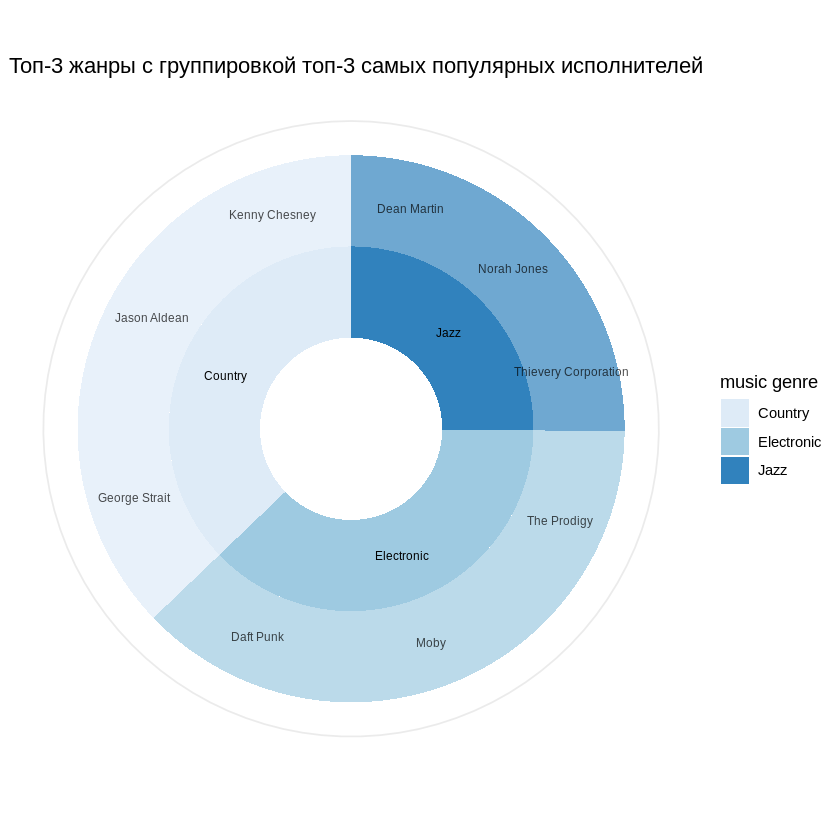

In [ ]:
require(dplyr)
genre<-music_genres
genre<-genre[order(genre$n, decreasing=TRUE),]
artist<-music_genre %>% count(music_genre, artist_name)

#топ-1 жанр
genre_1<-head(genre,1)
genre_1<-merge(x=genre_1,y=artist,by=c("music_genre"))
genre_1<-head(genre_1[order(genre_1$n.y, decreasing=TRUE),],3)


#топ-2 жанр
genre_2<-genre[2,]
genre_2<-merge(x=genre_2,y=artist,by=c("music_genre"))
genre_2<-head(genre_2[order(genre_2$n.y, decreasing=TRUE),],3)


#топ-3 жанр
genre_3<-genre[3,]
genre_3<-merge(x=genre_3,y=artist,by=c("music_genre"))
genre_3<-head(genre_3[order(genre_3$n.y, decreasing=TRUE),],3)


genre_12<-merge(x=genre_2,y=genre_1,all=TRUE)
genre_all<-merge(x=genre_3,y=genre_12,all=TRUE)


colnames(genre_all) <- c('name','n.x', 'type', 'value')
lvl0 <- tibble(name= '', value = 0, level = 0, fill = NA)
lvl1 <- genre_all %>%
    group_by(name) %>%
    summarise(value = sum(value)) %>%
    ungroup() %>%
    mutate(level = 1) %>%
    mutate(fill = name)
lvl2 <- genre_all %>%
    select(name = type, value, fill = name) %>%
    mutate(level = 2)
bind_rows(lvl0, lvl1, lvl2) %>%
    mutate(name = as.factor(name) %>% fct_reorder2(fill, value)) %>%
    arrange(fill, name) %>%
    mutate(level = as.factor(level)) %>%
    ggplot(aes(x = level, y = value, fill = fill, alpha = level)) +
        geom_col(width = 1,size = 0.25, position = position_stack()) +
        geom_text(aes(label = name), size = 2.5, position = position_stack(vjust = 0.5)) +
        coord_polar(theta = "y") +
        scale_alpha_manual(values = c("0" = 0, "1" = 1, "2" = 0.7), guide = NULL) +
        scale_x_discrete(breaks = NULL) +
        scale_y_continuous(breaks = NULL) +
        scale_fill_brewer(na.translate = F) +
        labs(x = NULL, y = NULL, fill = 'music genre') +
        ggtitle('Топ-3 жанры с группировкой топ-3 самых популярных исполнителей') +
        theme_minimal() 


**Вывод:** Данная диаграмма позволяет наглядно увидеть артистов, с наибольшим количеством треков в каждом жанре.

## Задание 5

На вертикальной столбиковой диаграмме для самого популярного и самого непопулярного жанров покажите средние значения по характеристикам. На одной диаграмме покажите 5 характеристик, в которых разница средних значений максимальна. На второй - в которых разница средних значений минимальна.

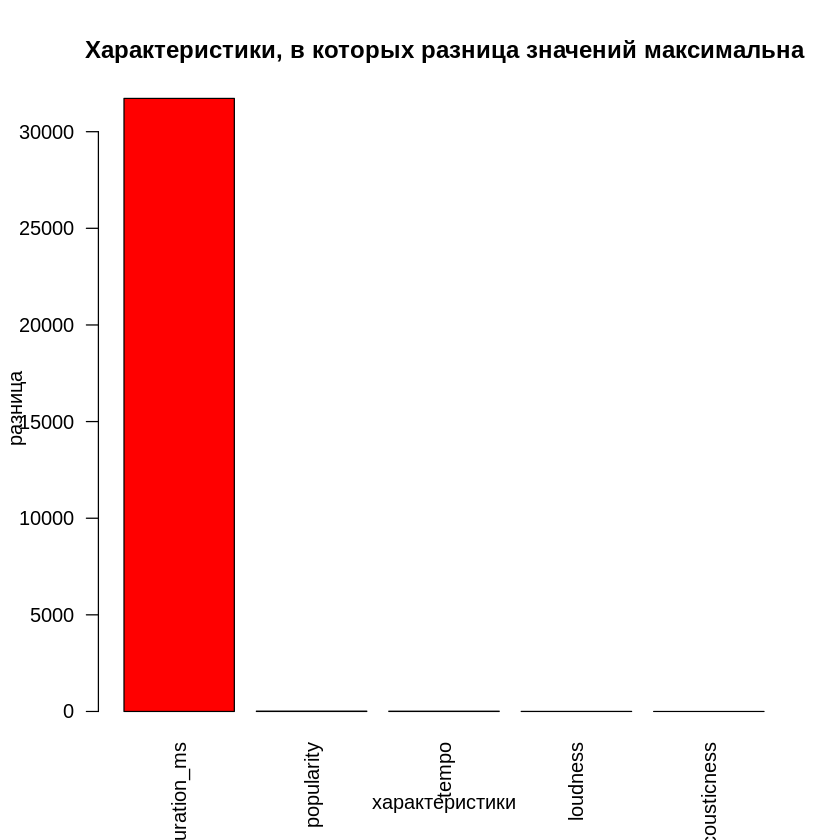

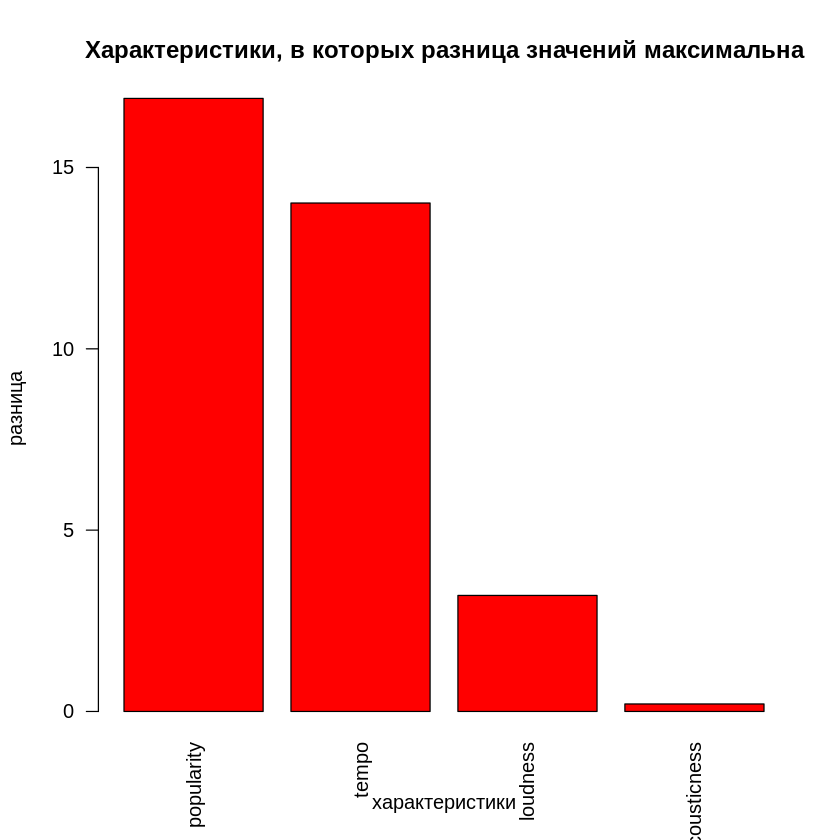

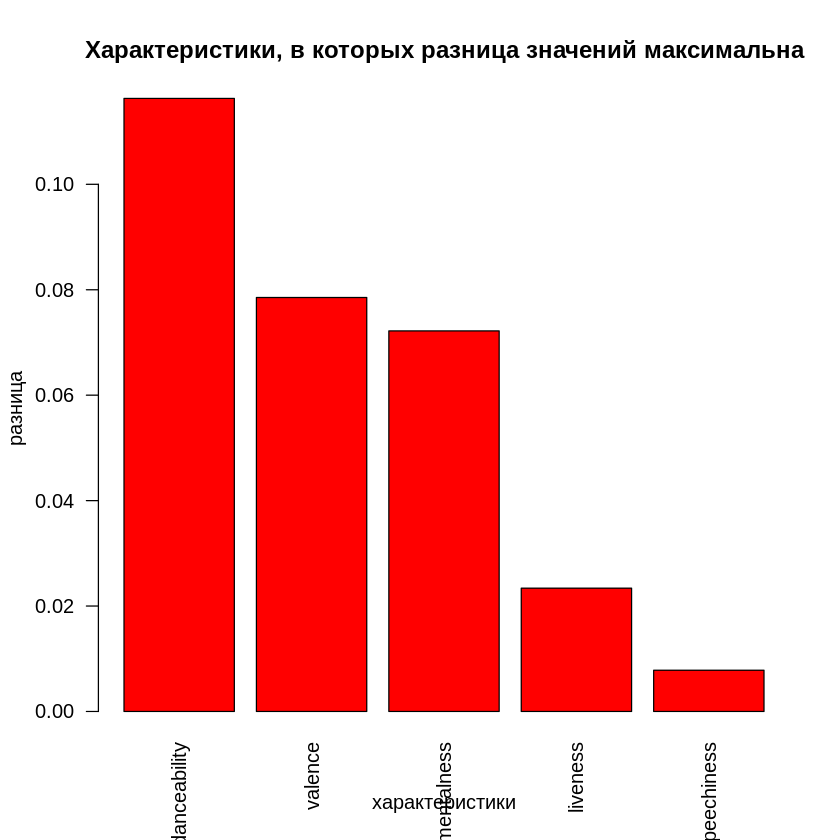

In [ ]:
genre_artist<-music_genre %>% count(music_genre)
genre_artist<-genre_artist[order(genre_artist$n, decreasing=TRUE),]

genre_top_first<-genre_artist[1,]$music_genre
genre_top_last<-genre_artist[10,]$music_genre


top_first<-music_genre[music_genre$music_genre==genre_top_first,]
top_last<-music_genre[music_genre$music_genre==genre_top_last,]
#выберем только числовые столбцы
top_first<-top_first[,c('music_genre','popularity','acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence')]
top_last<-top_last[,c('music_genre','popularity','acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence')]

top_first_mean<-aggregate(top_first[,c('popularity','acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence')], by=list(top_first$music_genre), FUN=mean)
top_last_mean<-aggregate(top_last[,c('popularity','acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence')], by=list(top_last$music_genre), FUN=mean)

table<-merge(x=top_last_mean,y=top_first_mean,all=TRUE)
table<-table[,2:12]
table<-t(table)


for(i in 1:11){table[i,1]=abs(table[i,1]-table[i,2])}
table<-table[order(table[,1], decreasing=TRUE),]
table_max<-table[1:5,]
table_min<-table[7:11,]

barplot(table_max[,1],horiz=FALSE,las=2,main = "Характеристики, в которых разница значений максимальна", 
        xlab = "характеристики",ylab="разница",col="red")
#чтобы нагляднее показать, убирём duration_ms
barplot(table_max[2:5,1],horiz=FALSE,las=2,main = "Характеристики, в которых разница значений максимальна", 
        xlab = "характеристики",ylab="разница",col="red")
barplot(table_min[,1],horiz=FALSE,las=2,main = "Характеристики, в которых разница значений максимальна", 
        xlab = "характеристики",ylab="разница",col="red")



**Вывод:** При анализе характеристик, разница в которых была максимальна, было выявлено, что duration_ms обладает слишком большим значением по сравнению с остальными, поэтому было принято решение построить диаграмму, исключив данный столбец.

## Задание 6

Добавьте в данные категориальный столбец `длительность_трека`, в котором будут значения: "короткая", "средняя", "длинная". Значения для каждой категории определите, исследовав данные в столбце `duration_ms`. Покажите график плотности распределения данных в столбце `loudness`, сгруппированных по категориям длительности.

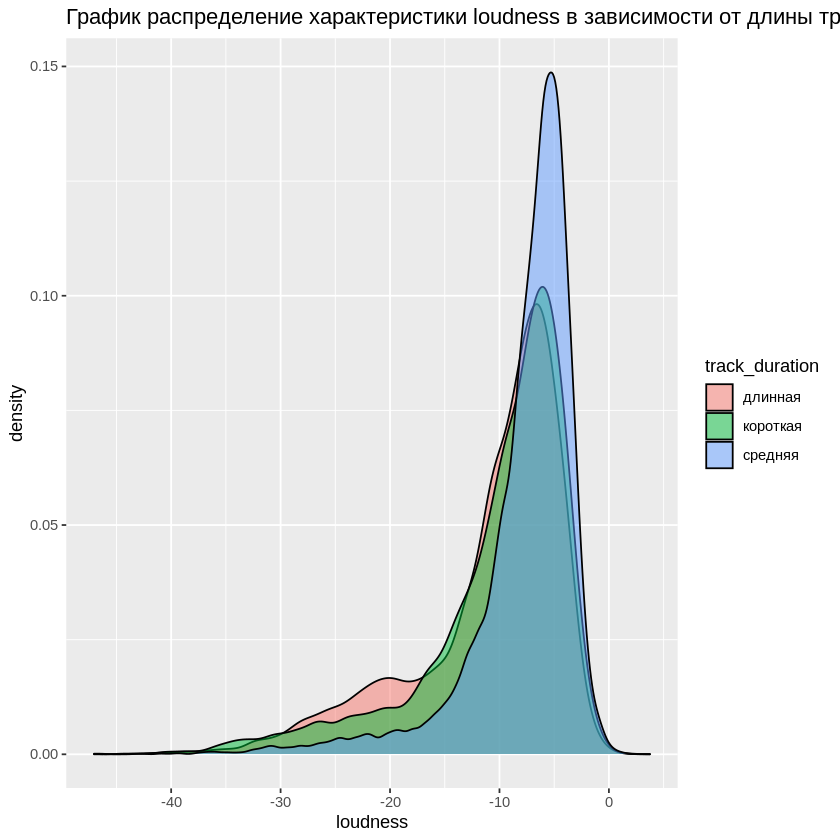

In [ ]:
music_genre<-music_genre[music_genre$duration_ms > 0, ]

short_tracks<-music_genre[music_genre$duration_ms<=190842,]
middle_tracks<-music_genre[music_genre$duration_ms>190842,]
middle_tracks<-middle_tracks[middle_tracks$duration_ms <= 276054, ]
long_tracks<-music_genre[music_genre$duration_ms>276054,]

short_tracks<-short_tracks %>% mutate (track_duration='короткая')
middle_tracks<-middle_tracks %>% mutate (track_duration='средняя')
long_tracks<-long_tracks %>% mutate (track_duration='длинная')

tracks_short_middle<-merge(x=short_tracks,y=middle_tracks,all=TRUE)
all_tracks<-merge(x=tracks_short_middle,y=long_tracks,all=TRUE)


ggplot(data = all_tracks, aes(x = loudness,
group = track_duration,
fill = track_duration)) +
geom_density(alpha = 0.5)+
labs(title = "График распределение характеристики loudness в зависимости от длины трека")



**Вывод:** Из данного графика можно заметить, что самая громкая музыка имеет среднюю длительность треков

## Задание 7

Покажите на ящиковой диаграмме отношение популярности треков к жанру. Какие жанры похожи между собой?

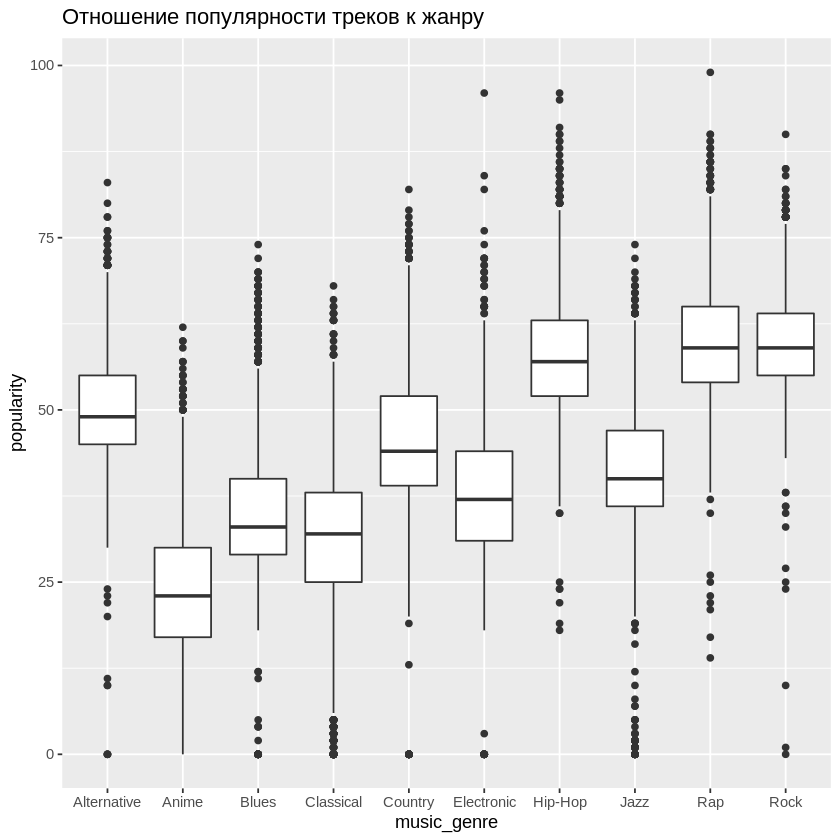

In [ ]:
library(tidyverse)

ggplot(data = music_genre, aes(x = music_genre, y = popularity,fill = popularity))+
geom_boxplot()+
ggtitle('Отношение популярности треков к жанру')


**Вывод:** Данный график говорит нам о том, что Rock,Hip-hop и Rap обладают примерно одиннаковой популярностью, несколько большей, чем остальные жанры

## Задание 8

На круговой диаграмме вида "пончик" покажите численное соотношение треков разной длительности (для длительности используйте новый категориальный столбец, сформированный в задании 6).

In [ ]:
library(ggplot2)
library(tidyverse)

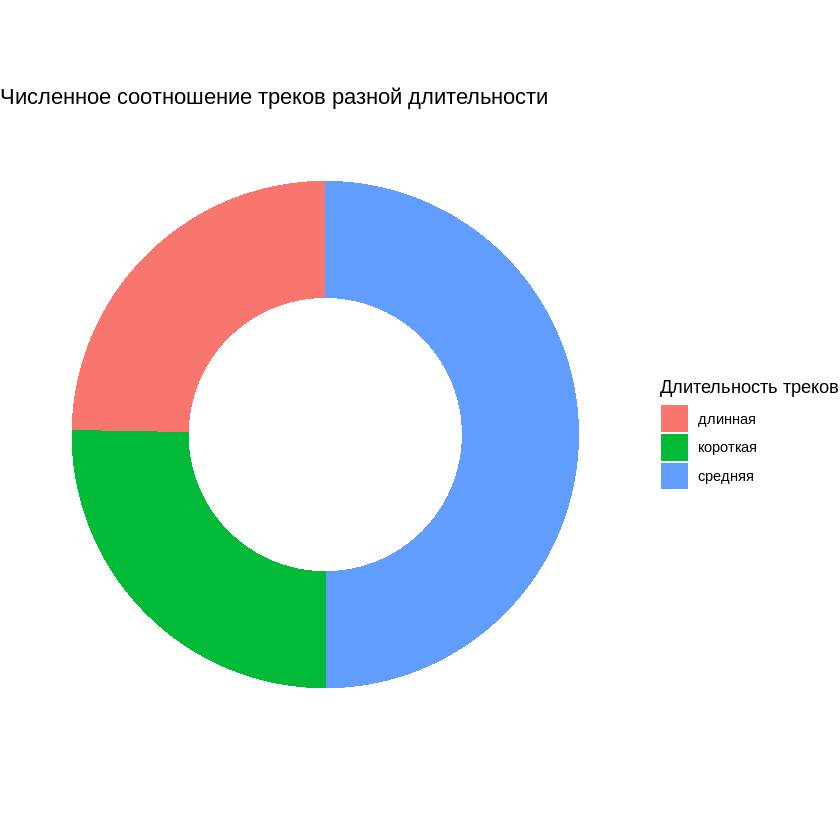

In [ ]:
all_track<-all_tracks %>% count(track_duration)
ggplot(all_track, aes(x = 2, y = n, fill = track_duration)) +
    geom_bar(stat = 'identity') +
    coord_polar(theta = "y", start = 0) + 
    theme_void() + 
    labs(fill = 'Длительность треков') +
    xlim(0.5, 2.5) +
    ggtitle('Численное соотношение треков разной длительности')

**Вывод:** Из данной диаграммы следует вывод, что треков средней длительности большинство